In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('mushroom.csv')

        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054


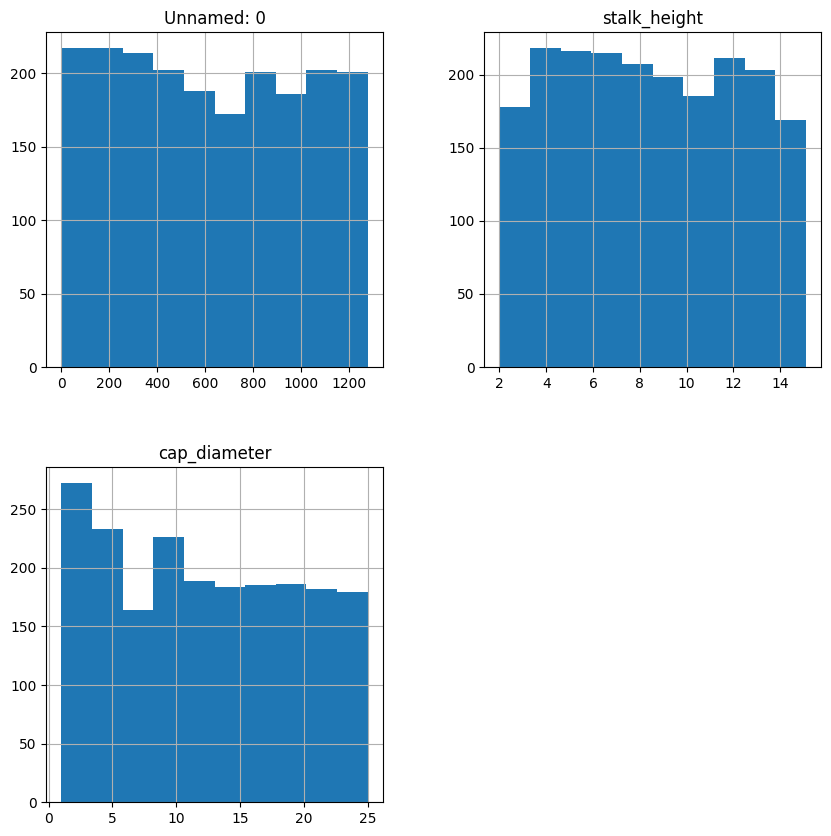

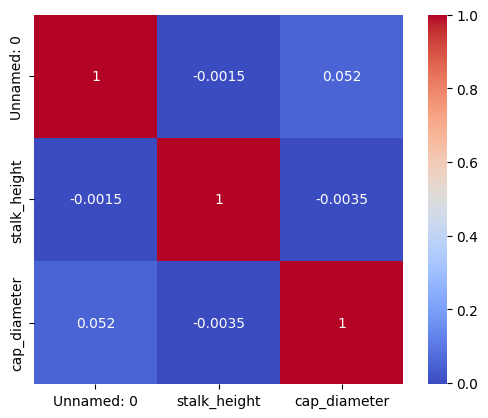

In [ ]:
# Get an overview of the dataset
print(df.describe())

# Create histograms for each feature
df.hist(figsize=(10, 10))
plt.show()

# Create a correlation matrix
corr_matrix = df.corr(numeric_only=True) # Add numeric_only=True to handle non-numeric columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

Task 2: Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns

# Encode categorical variables
le = LabelEncoder()
for var in categorical_vars:
    df[var] = le.fit_transform(df[var])

# Split the dataset into training and testing sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3- data visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plots to visualize feature relationships
sns.pairplot(df, vars=X.columns, hue='class')
plt.show()

# Visualize class distributions
sns.countplot(x='class', data=df)
plt.show()

KeyboardInterrupt: 

Task 4: SVM Implementation

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the SVM classifier
svm = SVC(kernel='linear', C=1)

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Evaluate model performance on the testing data
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Task 5: Visualization of SVM Results

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

Task 6: Parameter Tuning and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Task 7: Comparison and Analysis

In [ ]:
# Compare SVM performance with different kernels
kernels = ['linear', 'poly', 'rbf']
results = []
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    results.append((kernel, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')))

print("Kernel\tAccuracy\tPrecision\tRecall\tF1-score")
for result in results:
    print(f"{result[0]}\t{result[1]:.3f}\t{result[2]:.3f}\t{result[3]:.3f}\t{result[4]:.3f}")